# Unit 5 - Financial Planning


In [127]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import hvplot

In [128]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [129]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [130]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [131]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [132]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()
# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()



In [133]:
# Compute current value of my crpto
my_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
my_btc_value

13314.45

In [134]:
# Compute current value of my crpto
my_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value

415.06

In [135]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13314.45
The current value of your 5.3 ETH is $415.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [136]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [137]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [138]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [139]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


### Savings Health Analysis

In [156]:
# Create savings DataFrame

crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

portfolio = [{"crypto": crypto_value,
              "shares": stocks_value }]


#df_savings.columns('Portfolio', 'Amount')
df_savings1 = pd.DataFrame(portfolio)
    
df_savings = df_savings1.transpose(copy=False)
df_savings.rename(columns={"0": "Amount"})
df_savings.head()                        
# Display savings DataFrame
#display(df_savings)


,0
crypto,13729.51
shares,39675.50


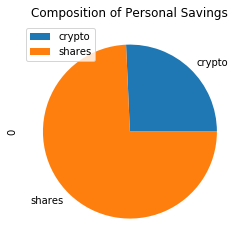

In [165]:
# Plot savings pie chart

df_savings.plot.pie(y=[0] , title="Composition of Personal Savings")

In [181]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings[0].sum()

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} away from reaching your goal of saving at least three times your monthly expenses")
else:
    print("Congratulations! You have reached your goal of saving at least three times your monthly expenses")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [182]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-20', tz='America/New_York').isoformat()

In [184]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   

                                                                
                             high       low   close     volume  
time                                                            
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.3000  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.5600  206.97   51484043

In [192]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Print the simulation input data
MC_dist.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
time                                               
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [193]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998173,0.992950,0.998644,0.998200,0.997460,1.014434,1.016861,1.000234,0.998682,0.999594,...,1.006536,0.995277,0.979186,0.991817,0.997548,0.999079,1.008904,1.002801,1.005286,1.016145
2,0.991728,0.989513,0.989659,1.000622,0.991500,1.012068,1.022809,0.997582,1.000845,1.014487,...,1.004083,1.000817,0.983287,0.995064,0.999507,1.007127,1.006408,1.004454,1.000200,1.021742
3,0.983035,0.987298,0.984865,1.012835,0.990975,1.027649,1.025880,0.986682,1.009418,1.003434,...,0.991342,1.007878,1.000665,0.992068,0.995207,0.993264,0.995929,0.999156,1.004331,1.010935
4,0.993049,0.978252,0.970656,1.008780,0.986311,1.026169,1.020452,0.987393,1.019194,1.007130,...,0.991956,1.008308,0.997626,0.978412,0.996486,1.005315,0.995949,1.000726,1.008481,1.008878
5,0.998375,0.986896,0.974514,0.996739,0.989974,1.028511,1.012032,0.990555,1.026341,1.003156,...,0.997511,1.004510,0.994207,0.983942,0.993224,1.015492,0.994615,1.017492,1.005799,1.008989
6,0.994154,0.988451,0.969718,0.989304,0.989893,1.019494,1.017908,0.993481,1.044250,1.009977,...,1.007187,0.996886,0.993276,0.988722,0.995378,1.010844,0.997380,1.015650,0.989561,1.012289
7,0.995904,0.985739,0.969857,0.989697,0.994257,1.021544,1.005084,0.992925,1.044172,1.012993,...,1.004518,0.997947,1.002067,0.996947,0.997013,1.022407,0.987872,1.025535,0.981841,1.000561
8,0.997163,0.991211,0.973920,0.987938,0.992885,1.027725,1.002430,0.988616,1.046273,1.029360,...,1.014394,1.001679,1.009487,1.005573,0.981188,1.024038,0.982325,1.029877,0.978520,1.017195
9,0.997813,0.984939,0.975792,0.992613,1.000511,1.017075,0.988351,0.982545,1.058660,1.035845,...,1.021836,0.989724,1.005101,1.006997,0.984157,1.029926,0.975527,1.019511,0.969752,1.017040


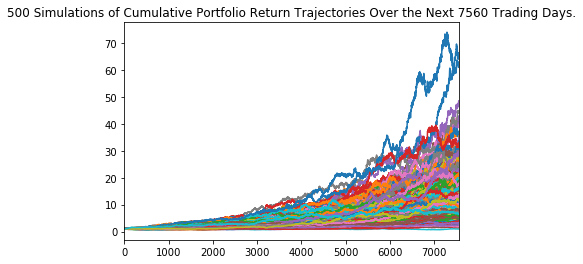

In [194]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

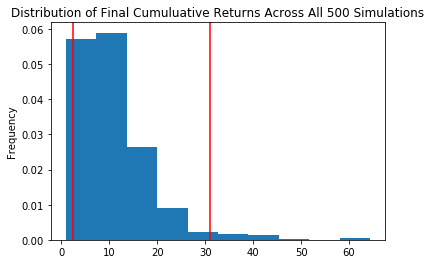

In [195]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [196]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.998507
std               7.775671
min               0.941243
25%               5.905035
50%               9.201238
75%              14.187419
max              64.399047
95% CI Lower      2.424619
95% CI Upper     31.069932
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [198]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48492.39 and $621398.64


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [199]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72738.58 and $932097.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [200]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)


# Print the simulation input data
MC_dist_2.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
time                                               
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [201]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994736,0.999128,1.009490,0.988790,1.000166,0.995933,1.001522,0.992053,0.994638,0.996761,...,1.002173,1.000054,1.003937,1.012402,1.001380,0.993731,0.997184,1.004129,0.993468,1.005573
2,0.982857,0.993008,1.007510,0.991488,1.005784,0.991825,1.008481,0.990112,0.991170,0.989034,...,0.995008,1.004318,1.011958,1.021977,1.003270,0.994460,0.987222,1.004255,0.984790,1.014592
3,0.981727,0.984052,1.015957,1.006547,1.019320,0.991212,1.013605,0.992453,1.004188,0.990942,...,0.993726,1.003478,1.010561,1.024491,1.012161,0.998963,0.981585,1.007988,0.985662,1.008117
4,0.988955,0.990081,1.006898,1.000778,1.016372,0.992096,1.007996,0.996701,1.000357,0.989826,...,0.995543,0.998237,1.008069,1.034094,1.015318,0.995908,0.976645,1.005943,0.978876,1.020154
5,0.989067,0.978937,1.010860,0.994399,1.030893,0.991605,1.021506,1.003202,0.990959,0.987707,...,0.998126,0.994323,0.996223,1.045290,1.014073,0.992752,0.975453,0.999040,0.970040,1.018241
6,0.991936,0.963987,1.018891,0.992957,1.030404,0.988777,1.020752,1.005966,0.993346,0.984370,...,0.998739,0.999401,0.979807,1.039462,1.019447,0.983204,0.980611,0.986209,0.973953,1.015223
7,0.980845,0.962092,1.009468,0.987612,1.033056,0.991156,1.014252,1.007661,0.991531,0.991569,...,1.002394,0.996551,0.991551,1.034586,1.016317,0.984770,0.980597,0.997399,0.969284,1.016036
8,0.976414,0.959026,1.004346,0.979866,1.033845,0.993637,1.015029,1.012116,0.987021,0.989785,...,0.996559,0.983228,0.985992,1.033975,1.013482,0.987192,0.970834,1.002415,0.958647,1.024614
9,0.967965,0.959080,0.997990,0.982693,1.046072,0.995930,1.015867,1.011012,0.970241,1.001305,...,1.002144,0.987874,0.979809,1.033160,1.019648,0.984156,0.977876,0.998241,0.942902,1.036261


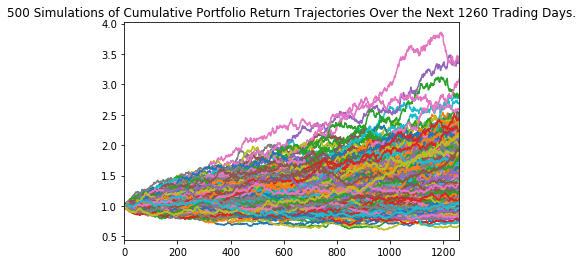

In [203]:
# Plot simulation outcomes
line_plot = MC_dist_2.plot_simulation()

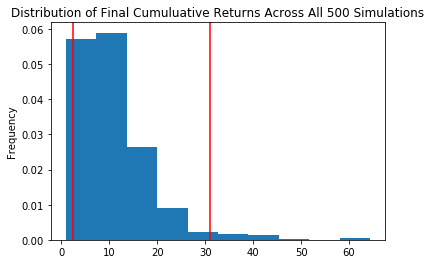

In [204]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

In [205]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_2.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.496688
std               0.405219
min               0.674013
25%               1.191402
50%               1.477733
75%               1.723619
max               3.369442
95% CI Lower      0.864383
95% CI Upper      2.382165
Name: 1260, dtype: float64


In [214]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51863.01 and $142929.93


### Ten Years Retirement Option

In [207]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Print the simulation input data
MC_dist_ten.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-10-20 00:00:00-04:00  109.64  109.78  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244.0   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-10-20 00:00:00-04:00          NaN  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.3000  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.5600  206.97   

                                                   
                              volume daily_return  
time                                               
2015-10-20 00:00:00-04:00   60081395          NaN  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602

In [208]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006622,1.004258,0.982672,0.987274,1.004696,1.010554,0.993417,1.007973,1.006722,1.007288,...,1.005333,1.003559,0.992245,1.001888,1.010511,0.990358,1.003251,1.013548,1.002183,1.001658
2,1.008581,0.994159,0.981326,0.978392,0.996859,1.009141,0.988532,1.018021,1.004564,1.006895,...,1.022921,1.008723,0.998809,1.000802,1.021595,0.986535,1.002657,1.006299,0.998937,0.998997
3,1.013753,0.990009,0.987089,0.975299,1.002703,1.004778,0.987022,1.019904,1.015626,0.999913,...,1.023121,0.990917,0.989907,1.004028,1.028868,0.984799,1.003441,1.010411,0.994974,1.004466
4,1.010955,0.991557,0.989643,0.973079,1.001525,1.017632,0.987909,1.026844,1.013707,0.994122,...,1.032561,0.989403,0.984650,1.000203,1.022190,0.985025,1.001826,1.012509,0.974991,1.014991
5,1.023163,0.992459,0.996358,0.972265,1.007751,1.025870,0.987148,1.043697,1.012522,0.998004,...,1.040760,0.977929,0.987444,1.005663,1.039712,0.988819,1.013051,1.013420,0.969337,1.011417
6,1.026215,0.981732,0.998139,0.972738,1.008145,1.039704,0.987123,1.046999,1.012332,0.994889,...,1.044288,0.973057,0.989402,1.005947,1.038630,0.991576,1.016974,1.019913,0.967223,1.008192
7,1.031529,0.982686,0.995204,0.971411,1.002330,1.037628,0.979286,1.050661,1.026205,0.988209,...,1.044423,0.975278,0.988451,0.998288,1.037383,0.991975,1.016958,1.030967,0.974063,1.005111
8,1.013357,0.981381,1.000910,0.976777,1.004809,1.039147,0.979708,1.055677,1.017946,0.979837,...,1.038792,0.975760,0.989978,1.000650,1.036804,0.990038,1.020257,1.023843,0.979130,1.001800
9,1.013808,0.983908,1.002421,0.985445,0.998520,1.037785,0.975404,1.051172,1.016070,0.975624,...,1.055819,0.973864,0.985150,1.009120,1.041587,0.993574,1.004714,1.020479,0.977886,1.003563


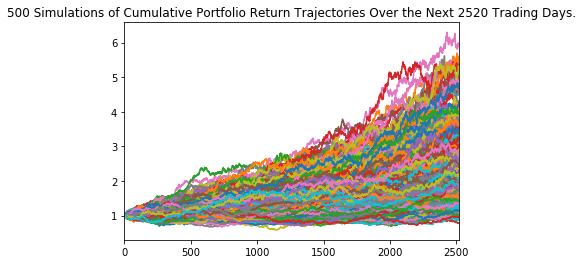

In [209]:
# Plot simulation outcomes
line_plot = MC_dist_ten.plot_simulation()

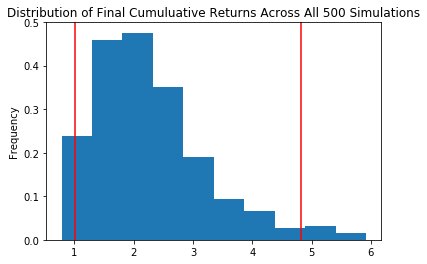

In [210]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_ten.plot_distribution()

In [211]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.267333
std               0.933932
min               0.784216
25%               1.583946
50%               2.075510
75%               2.743683
max               5.915913
95% CI Lower      1.018079
95% CI Upper      4.827379
Name: 2520, dtype: float64


In [215]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61084.71 and $289642.71
